# K-Nearest Neighbors

เราจะมาสร้างโมเดลแรก โดยใช้อัลกอริธึม K-Nearest Neighbors (KNN)

![alt text](https://cdn-images-1.medium.com/max/1600/0*Sk18h9op6uK9EpT8. "K-Nearest Neighbors: KNN")

อัลกอริธึมจะทำการเปรียบเทียบจุดใหม่ (New point) กับจุด (Point) ทั้งหมดที่อยู่ใน Training set เพื่อหาจุดที่ใกล้เคียงกับจุดใหม่ที่สุด โดยกำหนดจำนวนจุดที่ใกล้เคียงกับจุดใหม่จำนวน K จุด เช่น หากกำหนดให้ K=3 ดังนั้น จุดที่ใกล้เคียงกับจุดใหม่ทั้งสิ้นจำนวน 3 จุดจะถูกนำมาพิจารณา จากนั้นทำการกำหนด Label/Class ให้กับจุดใหม่ โดยตรวจสอบกับ Label ของทั้ง 3 จุด หากพบว่ามี Label ไหนมากที่สุด (Majority Vote) ก็จะกำหนดเป็น Label ให้กับจุดใหม่นั้น

จากตัวอย่าง 
```
หากกำหนดให้ K=1 จุดที่ใกล้กับจุดใหม่ที่สุดคือ Class สี่เหลี่ยม ดังนั้น จุดใหม่นั้นจะถูกกำหนดให้มี Class เป็น สี่เหลี่ยม
หากกำหนดให้ K=3 จุดที่ใกล้กับจุดใหม่ที่สุดสามลำดับคือ Class สี่เหลี่ยม 1 จุด และสามเหลี่ยม 2 จุด ดังนั้นจุดใหม่
    จะถูกกำหนดให้มี Class เป็น สามเหลี่ยม
```

## สร้างโมเดล KNN

In [5]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'], \
                                                    random_state=0)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# กำหนดให้ k=1
knn = KNeighborsClassifier(n_neighbors=1)

In [10]:
# สร้างโมเดล KNN
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## ทำการพยากรณ์ (Making Predictions)

In [56]:
#ชื่อและลำดับของ Target
print(iris_dataset['target_names'])

['setosa' 'versicolor' 'virginica']


In [16]:
# กำหนดข้อมูลที่จะใช้ในการพยากรณ์
X_new = X_test[1]
y_new = y_test[1]

print("Test data: {}".format(X_new))
print("Label: {}".format(y_new))

Test data: [6.  2.2 4.  1. ]
Label: 1


In [51]:
# ทำการพยากรณ์ข้อมูล X_new
prediction = knn.predict([X_new])

In [52]:
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
iris_dataset['target_names'][prediction]))

Prediction: [1]
Predicted target name: ['versicolor']


```
จากข้อมูลที่ใช้ทดสอบ  
Test data: [6.  2.2 4.  1. ]  
  
พบว่าผลลัพธ์ที่พยากรณ์ คือ 1 (versicolor)  

เมื่อนำไปเปรียบเทียบกับ Label ที่แท้จริง (Actual Label) ของข้อมูลพบว่าเป็นการพยากรณ์ที่ "ถูกต้อง"
```

In [53]:
# ทดสอบอีกครั้ง ด้วยข้อมูลชุดใหม่
X_new = X_test[2]
y_new = y_test[2]

prediction = knn.predict([X_new])

print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


In [57]:
# ทดสอบอีกครั้ง ด้วยข้อมูลชุดใหม่
X_new = X_test[3]
y_new = y_test[3]

prediction = knn.predict([X_new])

print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
iris_dataset['target_names'][prediction]))

Prediction: [2]
Predicted target name: ['virginica']


# ทดสอบประสิทธิภาพของโมเดล (Evaluating the Model)

In [21]:
# ใช้ข้อมูลทั้งหมดจาก Test set
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [23]:
import numpy as np

print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


## Accuracy Score

In [46]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9736842105263158

## Classification Report

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=iris_dataset['target_names']))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       1.00      0.94      0.97        16
  virginica       0.90      1.00      0.95         9

avg / total       0.98      0.97      0.97        38



## Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix: \n{}".format(confusion_matrix(y_test, y_pred)))

Confusion Matrix: 
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [42]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(iris_dataset.target_names))
    plt.xticks(tick_marks, iris_dataset.target_names, rotation=45)
    plt.yticks(tick_marks, iris_dataset.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


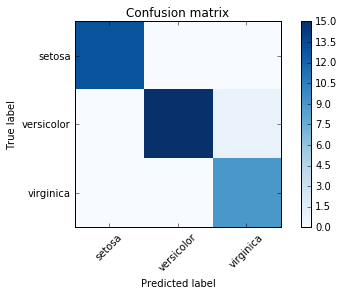

In [43]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)